# tab 7 of final project
# additional Vizzes for key Questions


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\Noah\4.3.24_INSTACART BASKET ANALYSIS"

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data', '..IC 4.10', '4.10_instacart.pkl'))

In [5]:
ords_prods_merge.head(100)

,user_id,First Name,Surname,Gender,State,Age,date_joined,Dependents,fam_status,income,...,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending_level,loyalty_flag_spending,median_days_since_prior,loyalty_flag_freq,department_name
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest day,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,beverages
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Most Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,beverages
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest day,Most Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,beverages
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Average Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,produce
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Least busy,Most Orders,8,New customer,7.988889,Low_spender,19.0,Regular_customer,produce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,...,Low-range product,Regularly busy,Most Orders,9,New customer,8.375962,Low_spender,7.0,Frequent_customer,dairy eggs
96,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,...,Low-range product,Least busy,Average Orders,9,New customer,8.375962,Low_spender,7.0,Frequent_customer,dairy eggs
97,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,...,Mid-range product,Regularly busy,Most Orders,9,New customer,8.375962,Low_spender,7.0,Frequent_customer,dry goods pasta
98,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,...,Mid-range product,Busiest day,Most Orders,9,New customer,8.375962,Low_spender,7.0,Frequent_customer,frozen


In [6]:
print(ords_prods_merge.columns)

Index(['user_id', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'Dependents', 'fam_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'eval_set', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_level',
       'loyalty_flag_spending', 'median_days_since_prior', 'loyalty_flag_freq',
       'department_name'],
      dtype='object')


In [7]:
# dropping non-relevant column
ords_prods_merge.drop(columns=['date_joined',],inplace=True)


In [8]:
print(ords_prods_merge['order_id'].head(),ords_prods_merge['order_number'].head())

0    2543867
1    1285508
2    2578584
3     518967
4    2524893
Name: order_id, dtype: int64 0    5
1    7
2    8
3    1
4    3
Name: order_number, dtype: int64


In [9]:
# creating sample size since data set is too big for CPU
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [10]:
big = ords_prods_merge[dev]

In [11]:
small = ords_prods_merge[~dev]

## creating chart to compare spend level of different customer loyalties

In [12]:
#new df for sum of order
df_orderid_sum = ords_prods_merge.groupby('order_id').agg({'prices':['sum']}).reset_index()

In [13]:
df_orderid_sum.head()

,order_id,prices
,,sum
0,2,91.6
1,3,70.3
2,4,92.8
3,5,210.7
4,6,27.5


In [14]:
#checking size to ensure accuracy
ords_prods_merge['order_id'].value_counts().shape

(3214668,)

In [16]:
# joining tuple
df_orderid_sum.columns = [''.join(col) if isinstance(col, tuple) else col for col in df_orderid_sum.columns]

In [17]:
print(ords_prods_merge.columns) 

Index(['user_id', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'Dependents', 'fam_status', 'income', 'product_id', 'product_name',
       'aisle_id', 'department_id', 'prices', 'order_id', 'eval_set',
       'order_number', 'orders_day_of_the_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spending_level', 'loyalty_flag_spending',
       'median_days_since_prior', 'loyalty_flag_freq', 'department_name'],
      dtype='object')


In [18]:
print(df_orderid_sum)

         order_id  pricessum
0               2       91.6
1               3       70.3
2               4       92.8
3               5      210.7
4               6       27.5
...           ...        ...
3214663   3421079        1.6
3214664   3421080       75.8
3214665   3421081       79.0
3214666   3421082       56.4
3214667   3421083       69.4

[3214668 rows x 2 columns]


In [19]:
# merging on order_id 
df_order_sum = pd.merge(ords_prods_merge, df_orderid_sum, on='order_id', suffixes=('', '_agg'))


In [20]:
print(df_order_sum.head())

   user_id First Name   Surname  Gender     State  Age  Dependents fam_status  \
0    26711    Deborah  Esquivel  Female  Missouri   48           3    married   
1    26711    Deborah  Esquivel  Female  Missouri   48           3    married   
2    26711    Deborah  Esquivel  Female  Missouri   48           3    married   
3    26711    Deborah  Esquivel  Female  Missouri   48           3    married   
4    26711    Deborah  Esquivel  Female  Missouri   48           3    married   

   income  product_id  ...     busiest_day  busiest_period_of_day  max_order  \
0  165665         196  ...     Busiest day         Average Orders          8   
1  165665        6184  ...     Busiest day         Average Orders          8   
2  165665        8617  ...     Busiest day         Average Orders          8   
3  165665         196  ...  Regularly busy            Most Orders          8   
4  165665        6184  ...  Regularly busy            Most Orders          8   

   loyalty_flag  spending_level 

In [21]:
order_sum_bar = df_order_sum.sort_values(by=['order_id', 'pricessum'], ascending=[True, False])

In [22]:
#defining categories for chart
average_order_loyal = order_sum_bar.groupby('loyalty_flag')['pricessum'].mean().sort_values(ascending=False)


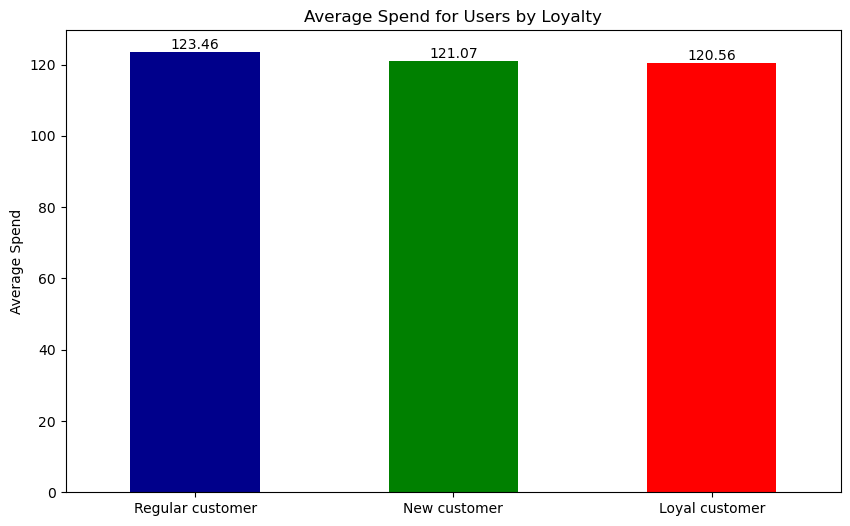

In [23]:
# plotting with color
plt.figure(figsize=(10, 6))
bar_avg_loyal_order = average_order_loyal.plot.bar(color = ['darkblue','green','red'])
plt.xlabel('')
plt.ylabel('Average Spend')
plt.title('Average Spend for Users by Loyalty')
plt.xticks(rotation=0)
for bar in bar_avg_loyal_order.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
plt.show()

In [24]:
bar_avg_loyal_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_avg_loyal_order.png'))

# Key Question 9: "Is there a connection between age and family status in terms of ordering habits"?


Age - 

In [25]:
ords_prods_merge.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'Dependents', 'fam_status', 'income', 'product_id', 'product_name',
       'aisle_id', 'department_id', 'prices', 'order_id', 'eval_set',
       'order_number', 'orders_day_of_the_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spending_level', 'loyalty_flag_spending',
       'median_days_since_prior', 'loyalty_flag_freq', 'department_name'],
      dtype='object')

In [26]:
age_fam_order = ords_prods_merge[['user_id','Age','fam_status','Dependents','orders_day_of_the_week','median_days_since_prior','loyalty_flag_freq']]

In [27]:
age_fam_order.tail(100)

,user_id,Age,fam_status,Dependents,orders_day_of_the_week,median_days_since_prior,loyalty_flag_freq
32399632,49635,62,married,3,6,10.0,nan
32399633,135902,66,married,2,5,8.0,Frequent_customer
32399634,135902,66,married,2,6,8.0,Frequent_customer
32399635,135902,66,married,2,6,8.0,Frequent_customer
32399636,135902,66,married,2,6,8.0,Frequent_customer
...,...,...,...,...,...,...,...
32399727,80148,55,married,1,6,12.0,Regular_customer
32399728,80148,55,married,1,6,12.0,Regular_customer
32399729,80148,55,married,1,6,12.0,Regular_customer
32399730,80148,55,married,1,6,12.0,Regular_customer


In [28]:
df_age_fam_order = age_fam_order.sort_values(by=['Dependents','median_days_since_prior'], ascending=[True,False])


# age to day of week

In [29]:
aggregations = {
    'Age': ['mean'],
}

In [30]:
print(aggregations)

{'Age': ['mean']}


In [31]:
df_result = age_fam_order.groupby('orders_day_of_the_week').agg(aggregations)
print(df_result)

                              Age
                             mean
orders_day_of_the_week           
0                       49.446090
1                       49.357713
2                       49.497359
3                       49.539556
4                       49.418349
5                       49.475558
6                       49.563514


<Figure size 1000x600 with 0 Axes>

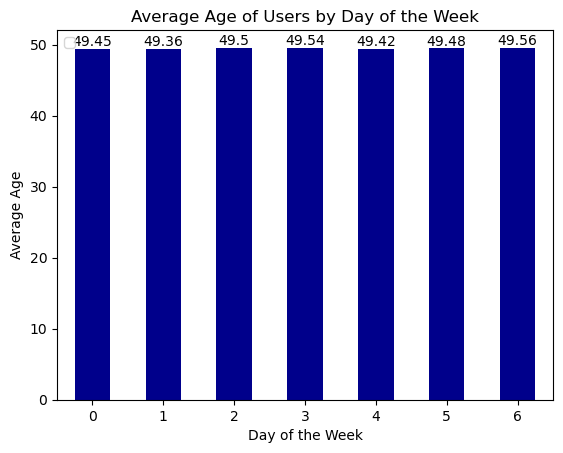

In [32]:
plt.figure(figsize=(10, 6))
bar_age_fam_order = df_result.plot.bar(color = ['darkblue'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Age')
plt.title('Average Age of Users by Day of the Week')
plt.xticks(rotation=0)
for bar in bar_age_fam_order.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
plt.legend('')
plt.show()

In [33]:
bar_age_fam_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_avg_dow.png'))

# fam status and order dow

In [34]:
fam_status_count = age_fam_order['fam_status'].value_counts()
print(fam_status_count)

fam_status
married                             22753055
single                               5324920
divorced/widowed                     2771355
living with parents and siblings     1550402
Name: count, dtype: int64


In [37]:
#grouped_hour_age = selected_columns.groupby(['order_hour_of_day','Age_Group']).size().unstack(fill_value=0)
grouped_status_dow = age_fam_order.groupby(['orders_day_of_the_week','fam_status']).size().unstack(fill_value=0)

In [41]:
df_status_dow = age_fam_order['orders_day_of_the_week'].groupby(fam_status_count.value_counts())

<Figure size 1000x600 with 0 Axes>

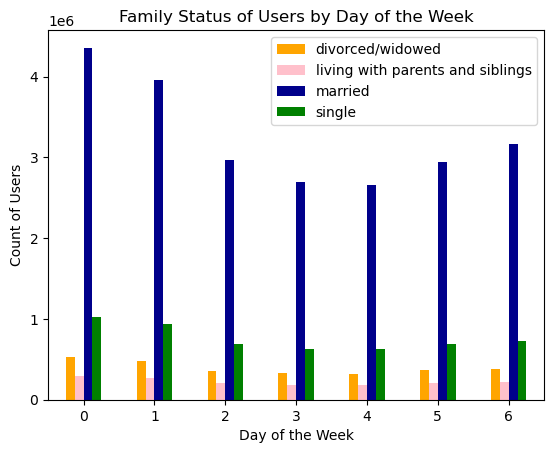

In [42]:
plt.figure(figsize=(10, 6))
bar_status_dow = groued_status_dow.plot.bar(color = ['orange','pink','darkblue','green'])
plt.xlabel('Day of the Week')
plt.ylabel('Count of Users')
plt.title('Family Status of Users by Day of the Week')
plt.xticks(rotation=0)

plt.legend()
plt.show()

In [43]:
bar_status_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_status_dow.png'))